<a href="https://colab.research.google.com/github/bibicoding/Coding-Project-Collection/blob/main/Self%20Study/Data%20Science/DataCamp/Exploring_Airbnb_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

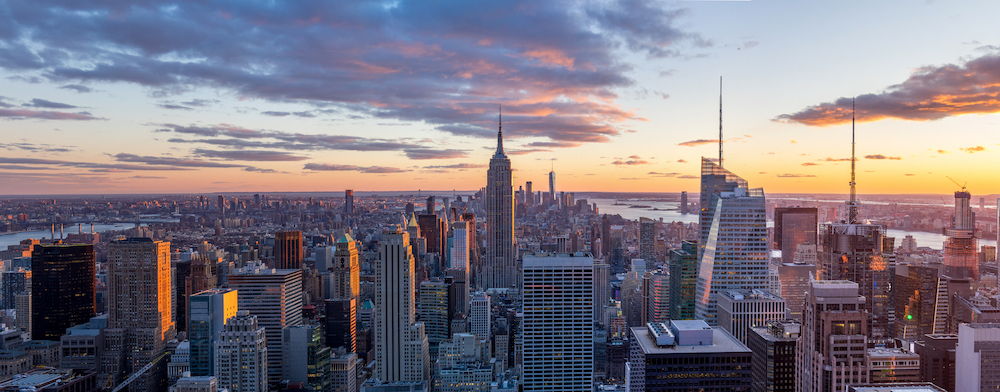

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, you will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx` (Excel files).

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data.
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed


In [ ]:
# We've loaded the necessary packages for you in the first cell. Please feel free to add as many cells as you like!
suppressMessages(library(dplyr)) # This line is required to check your answer correctly
options(readr.show_types = FALSE) # This line is required to check your answer correctly
library(readr)
library(readxl)
library(stringr)
library(lubridate)
library(ggplot2)


In [ ]:
# Load data
price_df <- read_csv("data/airbnb_price.csv")
room_type_df <- read_excel("data/airbnb_room_type.xlsx")
last_review_df <- read_tsv("data/airbnb_last_review.tsv")

Rows: 25209 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): price, nbhood_full
dbl (1): listing_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25209 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): host_name, last_review
dbl (1): listing_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


By combining these methods, you should be able to locate and load your data files successfully in your Colab R environment.

In [ ]:
# Check data
glimpse(price_df)
glimpse(room_type_df)
glimpse(last_review_df)

Rows: 25,209
Columns: 3
$ listing_id  <dbl> 2595, 3831, 5099, 5178, 5238, 5295, 5441, 5803, 6021, 6848…
$ price       <chr> "225 dollars", "89 dollars", "200 dollars", "79 dollars", …
$ nbhood_full <chr> "Manhattan, Midtown", "Brooklyn, Clinton Hill", "Manhattan…
Rows: 25,209
Columns: 3
$ listing_id  <dbl> 2595, 3831, 5099, 5178, 5238, 5295, 5441, 5803, 6021, 6848…
$ description <chr> "Skylit Midtown Castle", "Cozy Entire Floor of Brownstone"…
$ room_type   <chr> "Entire home/apt", "Entire home/apt", "Entire home/apt", "…
Rows: 25,209
Columns: 3
$ listing_id  <dbl> 2595, 3831, 5099, 5178, 5238, 5295, 5441, 5803, 6021, 6848…
$ host_name   <chr> "Jennifer", "LisaRoxanne", "Chris", "Shunichi", "Ben", "Le…
$ last_review <chr> "May 21 2019", "July 05 2019", "June 22 2019", "June 24 20…


In [ ]:
# Check for NA
colSums(is.na(price_df))
colSums(is.na(room_type_df))
colSums(is.na(last_review_df))

listing_id       price nbhood_full 
          0           0           0

listing_id description   room_type 
          0          10           0

listing_id   host_name last_review 
          0           8           0

In [ ]:
# Merge the dataframes
df <- price_df %>%
	  full_join(room_type_df, by = "listing_id") %>%
	  full_join(last_review_df, by = "listing_id")

glimpse(df)

Rows: 25,209
Columns: 7
$ listing_id  <dbl> 2595, 3831, 5099, 5178, 5238, 5295, 5441, 5803, 6021, 6848…
$ price       <chr> "225 dollars", "89 dollars", "200 dollars", "79 dollars", …
$ nbhood_full <chr> "Manhattan, Midtown", "Brooklyn, Clinton Hill", "Manhattan…
$ description <chr> "Skylit Midtown Castle", "Cozy Entire Floor of Brownstone"…
$ room_type   <chr> "Entire home/apt", "Entire home/apt", "Entire home/apt", "…
$ host_name   <chr> "Jennifer", "LisaRoxanne", "Chris", "Shunichi", "Ben", "Le…
$ last_review <chr> "May 21 2019", "July 05 2019", "June 22 2019", "June 24 20…


In [ ]:
# Clean data
df_clean <- df %>%
  # Convert price to integer
  mutate(price = as.numeric(str_replace_all(price, " dollars", ""))) %>%
  # Convert date to Datetime
  mutate(last_review = mdy(last_review)) %>%
  # Clean room type inconsistency
  mutate(room_type = str_to_lower(room_type))

glimpse(df_clean)

Rows: 25,209
Columns: 7
$ listing_id  <dbl> 2595, 3831, 5099, 5178, 5238, 5295, 5441, 5803, 6021, 6848…
$ price       <dbl> 225, 89, 200, 79, 150, 135, 85, 89, 85, 140, 215, 140, 99,…
$ nbhood_full <chr> "Manhattan, Midtown", "Brooklyn, Clinton Hill", "Manhattan…
$ description <chr> "Skylit Midtown Castle", "Cozy Entire Floor of Brownstone"…
$ room_type   <chr> "entire home/apt", "entire home/apt", "entire home/apt", "…
$ host_name   <chr> "Jennifer", "LisaRoxanne", "Chris", "Shunichi", "Ben", "Le…
$ last_review <date> 2019-05-21, 2019-07-05, 2019-06-22, 2019-06-24, 2019-06-0…


In [ ]:
# Question 1: What are the dates of the earliest and most recent reviews

In [ ]:
# Find the earliest and most recent reviews
first_reviewed <- min(df_clean$last_review)
last_reviewed <- max(df_clean$last_review)

first_reviewed
last_reviewed

[1] "2019-01-01"

[1] "2019-07-09"

In [ ]:
# Question 2: How many of the listing are private rooms?

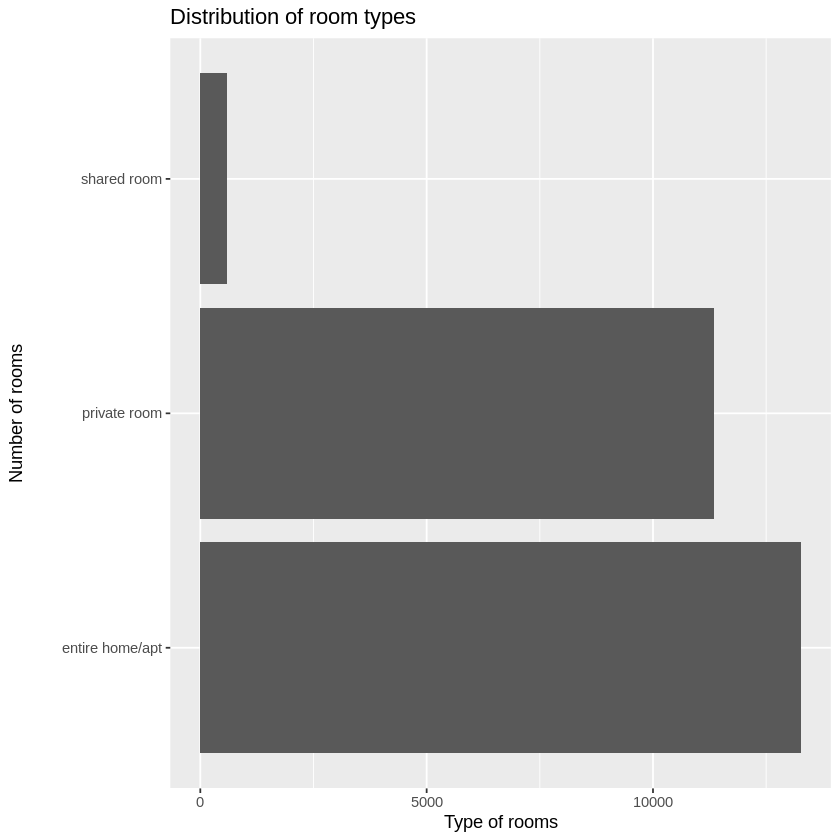

In [ ]:
# Examine the room types
nb_room_type <- df_clean %>%
  count(room_type) %>%
  arrange(desc(n))

# Plot the room type count
ggplot(nb_room_type, aes(x = room_type, y = n)) +
  geom_col() +
  coord_flip() +
  labs(
	  title = "Distribution of room types",
	  x = "Number of rooms",
	  y = "Type of rooms"
  )

In [ ]:
# Count the number of private rooms in the given data
nb_private_rooms <- df_clean %>%
  filter(room_type == "private room") %>%
  nrow()

nb_private_rooms

[1] 11356

In [ ]:
# Question 3: What is the average listing price for all rooms

In [ ]:
# Find the average of price in the cleaned dataframe
avg_price <- mean(df_clean$price)
avg_price

[1] 141.7779

In [ ]:
# Combine the four values into one tibble
review_dates <- data.frame(
	first_reviewed = first_reviewed,
	last_reviewed = last_reviewed,
	nb_private_rooms = nb_private_rooms,
	avg_price = avg_price
)

review_dates

first_reviewed,last_reviewed,nb_private_rooms,avg_price
<date>,<date>,<int>,<dbl>
2019-01-01,2019-07-09,11356,141.7779
